# CS 584 :: Data Mining :: George Mason University :: Fall 2024


# Homework 1: KNN&PCA

- **100 points [6% of your final grade]**
- **Due Sunday, Sep 23 by 11:59pm**

- *Goals of this homework:* (1) implement the KNN algorithm for classifying handwritten digit images; (2) implement the PCA algorithm to reduce the feature dimension so that we can speed up the KNN algorithm and also improve the classification performance; (3) tune the hyperparameters of the KNN and PCA algorithms to produce classification result as good as possible.

- *Submission instructions:* for this homework, you need to submit to two different platforms. First, you should submit your notebook file to **Blackboard** (look for the homework 1 assignment there). Please name your submission **FirstName_Lastname_hw1.ipynb**, so for example, my submission would be something like **Ziwei_Zhu_hw1.ipynb**. Your notebook should be fully executed so that we can see all outputs. Then, you need to output a txt file from this notebook (you will see later in this notebook) and submit it to the HW1 page in the http://miner2.vsnet.gmu.edu website.

## Part 1: KNN (40 points)

In this part, you need to implement your own KNN algorithm for classifying the digits (from 0 to 9) from the handwritten digit images (28 pixel * 28 pixel). The provided train.txt is the training data you will use for building your model. Each line in the file is one sample, whose first value is the ground-truth label and the following 784 values are the pixels of the image. First of all, let's load the data by excuting the following code.

In [107]:
import numpy as np

data = np.loadtxt("train.txt", delimiter=',').astype(int)
labels = data[:, 0].astype(int)
features = data[:, 1:]
print(features)
print('array of labels: shape ' + str(np.shape(labels)))
print('array of feature matrix: shape ' + str(np.shape(features)))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
array of labels: shape (60000,)
array of feature matrix: shape (60000, 784)


Now, we have the label variable to store the ground-truth labels (from 0 to 9) of all 60,000 samples, and matrix features to store the image pixels of these samples. Next, let's excute the following code to plot the first 4 samples to see how these images look like.

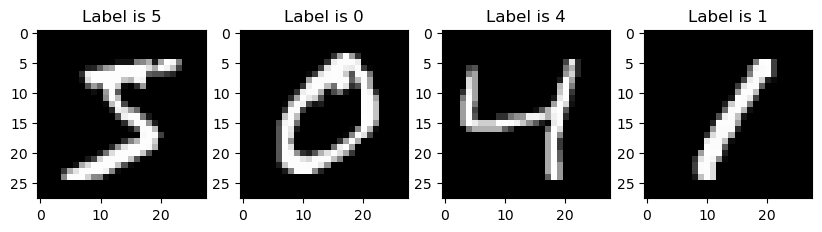

In [108]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 4, figsize=(10, 50))
for i in range(4):  
    ax[i].imshow(features[i].reshape((28, 28)), cmap=plt.get_cmap('gray'))
    ax[i].set_title('Label is %d' % labels[i])


Next, you need to **randomly** select 20% samples (sampling without replacement) from the data as the **validation set**, and generate the new **training set** by removing the selected validation samples from the original dataset. Write your code in the next cell.

**Note: You are NOT allowed to directly call APIs from an exiting Machine Learning library like sklearn. But you can use the 'random' library or the random module from 'numpy'**.

In [109]:
# Write your code here
np.random.shuffle(data)
print(len(data))
train,dev = np.split(data,[int(0.8*len(data))])
print('length of training data : '+ str(len(train)))
print('length of validation data : '+str(len(dev)))

print(dev)

60000
length of training data : 48000
length of validation data : 12000
[[3 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]
 ...
 [9 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]]


In [111]:
print(dev[:6])

[[3 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [8 0 0 ... 0 0 0]]


Now, it's time to implement your KNN algorithm. In the next cell, please write your code to predict labels for samples in the validation set by the KNN model built on the training set. Here we set K = 10 and use the Euclidean distance to find neighbors.

**Note: You should implement the algorithm by Python, Numpy, and other libraries you think are necessary. You are NOT allowed to directly call APIs from an exiting Machine Learning library like sklearn.**

**Note: Here, you should only use the labels from the training set for the KNN model.**

**Note: You can install and use the 'tqdm' library to help you track the process of your algorithm. Details are 'https://github.com/tqdm/tqdm'**

**Note: It takes 30~60 min to excute the KNN algorithm.**

In [112]:
# Write your code here
from tqdm import tqdm

X_train = train[:, 1:] #only have features
Y_train = train[:, 0]  #only have labels
X_dev = dev[:, 1:] #only have features
Y_dev = dev[:, 0]  #only have labels

print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_dev))
print(np.shape(Y_dev))

# This problem has 784 dimensions

#Function to calculate Euclidean distance between all Xtrain and target
#this is in vectorized format
def dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

#Function KNN
def knn(x, y, target, k=10):
    d = dist(x, target)
    
    #now sort the distances, we can retrieve the index of the values.
    #https://numpy.org/doc/stable/reference/generated/numpy.argpartition.html
    index_values = np.argpartition(d, k)[:k]
    
    #get the values/labels from those K indices
    res = y[index_values]
    
    #count the occurance of each label of k values
    res_labels, count = np.unique(res, return_counts=True)
    
    #get the maximun count label
    pred = res_labels[np.argmax(count)]
    
    return pred

print(X_dev.shape[0])
Validation_pred =[]
for i in tqdm(range(X_dev.shape[0]), desc="Processing Validation Set"):
    pred = knn(X_train, Y_train, X_dev[i])
    Validation_pred.append(int(pred))

print(Validation_pred[:5])

# pred = knn(X_train, Y_train, X_dev[1])
# print(pred)


(48000, 784)
(48000,)
(12000, 784)
(12000,)
12000


Processing Validation Set: 100%|█████████████████████████████████████████| 12000/12000 [19:26<00:00, 10.29it/s]

[3, 3, 8, 3, 3]


In [114]:
print(Validation_pred[:20])
print(np.shape(X_train))

[3, 3, 8, 3, 3, 8, 5, 1, 7, 2, 2, 0, 5, 4, 5, 7, 1, 1, 8, 8]
(48000, 784)


Then, please write code to compute the Accuracy, and Micro-averaged and Macro-averaged F1 scores to evaluate the performance on the validation set.

Print out these three metrics.

In [115]:
# Write your code here

#function to define accuracy of the algorithm on validation set
def calculate_accuracy(ground_truth, predictions):
    
    #count the number of correct predictions
    right_preds = np.sum(ground_truth==predictions)
    
    #accuracy = number of correct predictions/total number of predictions
    accuracy_score = right_preds/len(ground_truth)
    return accuracy_score

#function to calculate precision, recall and F1 scores
def precision_recall_F1(tp,fp,fn):
    p = tp/(tp+fp) if (tp + fp) > 0 else 0
    r = tp/(tp+fn) if (tp + fn) > 0 else 0
    f1_score = (2*p*r)/(p+r) if (p + r) > 0 else 0
    
    return p,r,f1_score

def macro_micro_f1scores(ground_truth, predictions, num_classes):
    
    #lets convert the lists to numpy arrays(vectorized) - more optimized approach
    ground_truth = np.array(ground_truth)
    predictions = np.array(predictions)
    
    #Create an array to store the number of TPs, FPs and FNs
    tp = np.zeros(num_classes)
    fp = np.zeros(num_classes)
    fn = np.zeros(num_classes)
    
    
    for i in range(num_classes):
        tp[i]=np.sum((ground_truth==i) & (predictions==i))
        fp[i]=np.sum((ground_truth!=i) & (predictions==i))
        fn[i]=np.sum((ground_truth==i) & (predictions!=i))
    
    #Micro-averaged F1 score (Compute performance from the complete confusion matrix) : 
    
    #Calculate the total no.of TPs, FPs and FNs on all classes
    tp_micro = np.sum(tp)
    fp_micro = np.sum(fp)
    fn_micro = np.sum(fn)
    
    #calculate precision,recall and f1 scores for micro averaged f1 score
    precision_micro, recall_micro, f1_micro = precision_recall_F1(tp_micro, fp_micro, fn_micro)
    
    #Macro-averaged F1 score (Compute performance for each class, then average.):
        
    f1_macro = 0
    for i in range(num_classes):
        _,_,f1 = precision_recall_F1(tp[i], fp[i], fn[i])
        f1_macro += f1
        
    f1_macro = f1_macro/num_classes
        
    return f1_micro, f1_macro
        
    
num_classes=10 #since we have 10 digits 0-9
ground_truth = Y_dev
predictions = Validation_pred
    
#accuracy of the algorithm
accuracy = calculate_accuracy(ground_truth, predictions)
print(f"Accuracy: {accuracy:.6f}")

# Micro and Macro F1 scores
f1_micro, f1_macro = macro_micro_f1scores(ground_truth, predictions, num_classes)
print(f"Micro-averaged F1: {f1_micro:.6f}")
print(f"Macro-averaged F1: {f1_macro:.6f}")


Accuracy: 0.968083
Micro-averaged F1: 0.968083
Macro-averaged F1: 0.968116


## Part 2: PCA (30 points)

In this part, you will implement the PCA algorithm to reduce the input dimension for the handwritten digit recognition task. In the next cell, please write your code to compute the transformation matrix in the PCA method for the training set we got from the previous part. Here, we only keep the **top 50 dimensions**.

**Hint: You can use the function from the Numpy library to compute SVD:**

*u, s, v = np.linalg.svd(a, full_matrices=False)*


**Note: You should only use the training set to compute PCA without using validation set.**

In [116]:
# Write your code here

#function to define PCA algorithm to resuce the input dimensions
def PCA(X_train, dimensions):
    
    #find the mean of each feature and then sutract mean to each feature from data points.
    Mean_data = np.mean(X_train,axis=0)
    X_Mean = X_train - Mean_data
    
    # SVD - to decompose a matrix into 3 matrices u,s,v
    # U - Left singular matrix, S - has the singular values, V - Right singular matrix
    u, s, v = np.linalg.svd(X_Mean, full_matrices=False)
    
    #select top 50 dimensions that are required for us, these are our principal components
    Principal_Components = v[:dimensions,:]
    
    #Transpose the prinicpal_components matrix and multiply it with the X_mean matrix.
    #This is to project the data onto lower dimensions defined by PCA    
    X_lowered = np.dot(X_Mean, Principal_Components.T)
    
    return X_lowered, Principal_Components

#we need to keep the top 50 dimensions.
dimensions = 50
new_X_train = X_train #only features
X_lowered, transformed_matrix = PCA(new_X_train,dimensions)

print(f"New Reduced data: Shape {X_lowered.shape}")
print(f"Transformation matrix: Shape: {transformed_matrix.shape}")


New Reduced data: Shape (48000, 50)
Transformation matrix: Shape: (50, 784)


Now, you need to apply the computed transformation matrix to reduce the dimension for the training set and the validation set. Then, build a new KNN model on the dimension-reduced traning data and predict the labels for the dimension-reduced validation set. 

Print out the Accuracy, and Micro-averaged and Macro-averaged F1 scores.

**Note: When you calculate the centered data for the validation set, you can calculate the mean feature values just by the validation data itself.**

In [118]:
# Write your code here

#function to apply PCA to validation set
def PCA_for_validation(X_dev, tranformed_matrix, mean):
    #center the data
    X_Mean = X_dev-mean
    
    #apply PCA
    X_lowered_val = np.dot(X_Mean, tranformed_matrix.T)
    return X_lowered_val

#Apply PCA to validation set using the tranformation matrix
new_X_dev = X_dev
mean = np.mean(new_X_train,axis=0)
X_lowered_val = PCA_for_validation(new_X_dev, transformed_matrix, mean)

# Use KNN to predict the labels on the reduced validation data
Validation_pred_reduced = []
for i in tqdm(range(X_lowered_val.shape[0]), desc="Processing Validation Set with Reduced Dimensions"):
    pred = knn(X_lowered, Y_train, X_lowered_val[i])
    Validation_pred_reduced.append(int(pred))

# Calculate accuracy, micro-averaged, and macro-averaged F1 scores
ground_truth = Y_dev
predictions = Validation_pred_reduced

#accuracy of the algorithm
accuracy = calculate_accuracy(ground_truth, predictions)
print(f"Accuracy after implementing PCA: {accuracy:.6f}")

# Micro and Macro F1 scores
f1_micro, f1_macro = macro_micro_f1scores(ground_truth, predictions, num_classes=10)
print(f"Micro-averaged F1 after implementing PCA: {f1_micro:.6f}")
print(f"Macro-averaged F1 after implementing PCA: {f1_macro:.6f}")

Processing Validation Set with Reduced Dimensions: 100%|████████████████| 12000/12000 [00:45<00:00, 265.31it/s]

Accuracy after implementing PCA: 0.975250
Micro-averaged F1 after implementing PCA: 0.975250
Macro-averaged F1 after implementing PCA: 0.975190


## Part 3: Tune Hyperparameter [Need to submit to Miner2] (30 points)

In this part, you need to do your best to tune the hyperparameter in KNN and PCA to build the best model and submit the predictions for the testing data to Miner2 system. First of all, let's load the testing data by excuting the following code.

In [119]:
test_features = np.loadtxt("test.txt", delimiter=',').astype(int)
print('array of testing feature matrix: shape ' + str(np.shape(test_features)))

array of testing feature matrix: shape (10000, 784)


Now, you should tune three hyperparameters:

- the number of nearest neighbors in KNN 
- the distance measurement (choose from Euclidean distance, L1 norm distance, and cosine distance)
- the number of dimensions kept in PCA 

Rules:

- Write your predictions for samples in the testing set into a file, in which each line has one integer indicating the prediction from your best model for the corresponding sample in the test.txt file. Please see the format.txt file in Miner2 as one submission example. Name the submission file hw1_Miner2.txt and submit it to Miner2 HW1 page.
- The public leaderboard shows results for 50% of randomly chosen test instances only. This is a standard practice in data mining challenge to avoid gaming of the system. The private leaderboard will be released after the deadline evaluates all the entries in the test set.
- You are allowed 5 submissions in a 24 hour cycle. 
- The final score and ranking will always be based on the last submission.
- Grading will only be based on the model performance (based on Accuracy metric) instead of ranking. You'll get full credit as long as your socre is a reasonable number.


**Hint: You can tune these hyperparameters by one randomly generated validation set (like what you have done in previous parts), or you can also use the cross-validation method.**

**Hint: To save your time, you can subsample 50% (or even less) of the training data to tune hyper-parameters.**

**Note: For each hyper-parameter, you must try at least 2 different values.**

In [120]:
# Write your code here

#funtion to define L1 norm distance

def l1_dist(x1, x2):
    return np.sum(np.abs(x1 - x2), axis=1)

#function to define cosine distance
def cosine_dist(x1, x2):
    
    #using vectorization
    X_n = np.linalg.norm(x1, axis=1)
    Y_n = np.linalg.norm(x2)

    dots = np.dot(x1,x2)
    similarity = dots/(X_n*Y_n)
    dist = 1 - similarity
    
    return dist

In [121]:
#define a knn function for 3 different distance metrics
def knn(x, y, target, k=10, distance_metric='euclidean'):
    # Select distance metric
    if distance_metric == 'euclidean':
        d = dist(x, target)  # Euclidean distance
    elif distance_metric == 'l1':
        d = l1_dist(x, target)  # L1 Norm distance
    elif distance_metric == 'cosine':
        d = cosine_dist(x, target) # Cosine distance
    
    #now sort the distances, we can retrieve the index of the values.
    index_values = np.argpartition(d, k)[:k]
    res = y[index_values]
    
    #count the occurance of each label of k values
    res_labels, count = np.unique(res, return_counts=True)
    pred = res_labels[np.argmax(count)]
    
    return pred

In [122]:
def cross_validation(X_train, Y_train, k_values, distances, pca_dimensions, nfolds=5, subsample_size=0.5):
    best_accuracy=0 # this is to store best accuracy
    best_parameters = None # a variable to store best hyperparameters
    
    # Subsample the training data
    if subsample_size < 1.0:
        subsample_indices = np.random.choice(X_train.shape[0], size=int(X_train.shape[0] * subsample_size), replace=False)
        X_train = X_train[subsample_indices]
        Y_train = Y_train[subsample_indices]
    
    #Split the training data into n folds
    size_fold = X_train.shape[0]//nfolds
    indices = np.arange(X_train.shape[0])
    
    for dim in pca_dimensions:
        
        # Apply PCA to the entire training data
        X_lowered_train, transformed_matrix = PCA(X_train, dim)
        
        #now perform cross-validation
        accuracies =[] # to store accuracy of each fold along with hyperparameters
        
        for fold in range(nfolds):
            
            #Generate training and validation sets for each fold
            dev_indices = indices[fold * size_fold:(fold + 1) * size_fold]
            training_indices = np.concatenate([indices[:fold * size_fold], indices[(fold + 1) * size_fold:]])
            
            X_train_fold = X_lowered_train[training_indices]
            Y_train_fold = Y_train[training_indices]
            X_dev_fold = X_lowered_train[dev_indices]
            Y_dev_fold = Y_train[dev_indices]
            
            #loop over all hyperparameters
            for k in k_values:
                for dist in distance_metrics:
                    
                    dev_predictions = []
                    for i in range(X_dev_fold.shape[0]):
                        
                        #Use knn function to predict the values
                        pred = knn(X_train_fold, Y_train_fold, X_dev_fold[i], k, dist)
                        dev_predictions.append(int(pred))
                        
                    #Evaluate accuracy using the function calculate accuracy defined for knn
                    accuracy = calculate_accuracy(Y_dev_fold, dev_predictions)
                    accuracies.append((accuracy, k, dist, dim))
                    
                    # Print progress
                    print(f"Fold {fold+1} Accuracy: {accuracy:.4f}, K: {k}, Distance Metric: {dist}, PCA Dimensions: {dim}")
        
        # calculate average accuracy accross all folds
        average_accuracy = np.mean([x[0] for x in accuracies])
        
        #if current config has higher average accuracy than a previous, update that.
        if average_accuracy > best_accuracy:
            best_accuracy = average_accuracy
            best_params = max(accuracies, key=lambda x: x[0])[1:]
    
    return best_params, best_accuracy
   

In [123]:
#Define the values we want for each hyperparameter

k_values = [5,7,10]  # Different K values
distance_metrics = ['euclidean','l1','cosine']  # different distance metrics to try
pca_dims = [50,100]  # Number of PCA dimensions to have

best_parameters, best_accuracy = cross_validation(X_train, Y_train, k_values, distance_metrics, pca_dims)
print(f"Best Parameters: K={best_parameters[0]}, Distance Metric={best_parameters[1]}, PCA Dimensions={best_parameters[2]}")


Fold 1 Accuracy: 0.9683, K: 5, Distance Metric: euclidean, PCA Dimensions: 50
Fold 1 Accuracy: 0.9652, K: 5, Distance Metric: l1, PCA Dimensions: 50
Fold 1 Accuracy: 0.9667, K: 5, Distance Metric: cosine, PCA Dimensions: 50
Fold 1 Accuracy: 0.9660, K: 7, Distance Metric: euclidean, PCA Dimensions: 50
Fold 1 Accuracy: 0.9644, K: 7, Distance Metric: l1, PCA Dimensions: 50
Fold 1 Accuracy: 0.9635, K: 7, Distance Metric: cosine, PCA Dimensions: 50
Fold 1 Accuracy: 0.9658, K: 10, Distance Metric: euclidean, PCA Dimensions: 50
Fold 1 Accuracy: 0.9613, K: 10, Distance Metric: l1, PCA Dimensions: 50
Fold 1 Accuracy: 0.9629, K: 10, Distance Metric: cosine, PCA Dimensions: 50
Fold 2 Accuracy: 0.9696, K: 5, Distance Metric: euclidean, PCA Dimensions: 50
Fold 2 Accuracy: 0.9640, K: 5, Distance Metric: l1, PCA Dimensions: 50
Fold 2 Accuracy: 0.9656, K: 5, Distance Metric: cosine, PCA Dimensions: 50
Fold 2 Accuracy: 0.9646, K: 7, Distance Metric: euclidean, PCA Dimensions: 50
Fold 2 Accuracy: 0.9621

In [128]:
#The final best hyperparameter setting is: k=5, Distance metric=Euclidean, PCA=50

best_k = best_parameters[0]
best_dist_metric = best_parameters[1]
best_pca_dim = best_parameters[2]
#Apply PCA on the best metrics on training data
X_lowered_train, transformed_matrix = PCA(X_train, best_pca_dim)

print(np.shape(X_train))
print(np.shape(transformed_matrix))
print(np.shape(test_features))

# Apply PCA to the test data
X_lowered_test = PCA_for_validation(test_features, transformed_matrix, np.mean(X_train, axis=0))

#use KNN to predict labels for test set
test_pred = []
for i in tqdm(range(X_lowered_test.shape[0]), desc="Processing Validation Set"):
    pred = knn(X_lowered_train, Y_train, X_lowered_test[i], k=best_k, distance_metric=best_dist_metric)
    test_pred.append(int(pred))



(48000, 784)
(50, 784)
(10000, 784)


Processing Validation Set: 100%|████████████████████████████████████████| 10000/10000 [00:37<00:00, 267.88it/s]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]


In [144]:
print(test_pred[:20])
print(len(test_pred))

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]
10000


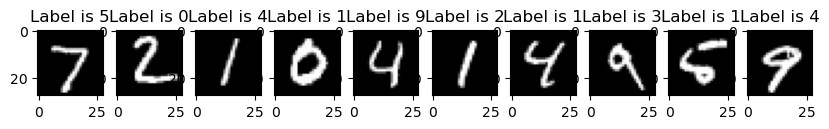

In [148]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 10, figsize=(10, 50))
for i in range(10):  
    ax[i].imshow(test_features[i].reshape((28, 28)), cmap=plt.get_cmap('gray'))
    ax[i].set_title('Label is %d' % labels[i])

In [137]:
with open('hw1_Miner2.txt', 'w') as f:
    for pred in test_pred:
        f.write(f"{pred}\n")

### Question: What is your final hyperparameter setting? How do you tune them? What choices have you tried?

#### Write your answer here
The final hyperparameter setting is 
K = 5
Distance Metric = Euclidean
PCA dimensions = 50

This setting gave me the best accuracy. I tuned the hyperparameter setting by using cross validation method. Iterated over different values of k, distance metrics and PCA dimensions on a knn model.
For each combination, i performed 5 fold cross validation. I have calculated the average accuracy of each fold.
I chose the best parameter with highest average accuracy accross all folds

I have tried below choices for hyper parameters
For K, i tried with k=5,7,10. Lower k values perfomed better in this case.
For distance metrics, i tried using Euclidean, Manhattan and cosine distances. Euclidean performed better than the others in all cases
For PCA dimensions, i tries with 50 and 100 dimensions. 50 was more effective here. Did not over compress the data aswell. 

By comparing all the above combinations, when k=5, distance metric=Euclidean and PCA dimensions= 50 acheived best accuracy while using cross validation.

### Question: your username in Miner2 and the score and ranking of your submission in Miner2 (at the time of answering this question)

#### Write your answer here
UserName : pganapar@gmu.edu
Score : 0.98
Rank : 2
